<a href="https://colab.research.google.com/github/ayan-2025/Learning-to-Learn-Model-Regression-Network/blob/main/Learning_to_Learn_Model_Regression_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits

digits = load_digits()
digits

Mounted at /content/drive/


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(digits.data)
y = digits.target


Now we are making Model pair set 

In [3]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score


model_X = []
model_y = []

for i in range(1,8):
   
   negative_examples = digits.data[digits.target != i]
   num_negative_examples = 100
   negative_examples_subsampled = resample(negative_examples, n_samples=num_negative_examples, random_state=42)
   
   subsampled_X = np.vstack((digits.data[digits.target == i], negative_examples_subsampled))
   subsampled_y = np.hstack((np.ones(np.count_nonzero(digits.target == i)), np.zeros(num_negative_examples)))
   
   random_state_C_map = {0: 0.01, 42: 0.1, 123: 1, 130: 10, 140: 100}
   
   train_X, test_X, train_y, test_y = split(subsampled_X, subsampled_y, test_size=0.1, shuffle=True, random_state=0)
   param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
   svm = SVC(kernel='linear')
   grid_search = GridSearchCV(svm, param_grid, cv=5)
   grid_search.fit(train_X, train_y)
   C = grid_search.best_params_['C']
   svm = SVC(kernel='linear', C=C)
   svm.fit(train_X, train_y)
   w_1 = svm.coef_

   print("For class: ", i)
   print("Best parameters:", grid_search.best_params_)
   print("Accuracy:", grid_search.score(test_X, test_y))
   print("w_1 value: ", w_1)

   for random_state in random_state_C_map.keys():
     train_small_X, test_small_X, train_small_y, test_small_y = split(train_X, train_y, test_size=0.3, shuffle=True, random_state=random_state) #check point
     C = random_state_C_map[random_state]
     svm = SVC(kernel='linear', C=C)
     svm.fit(test_small_X, test_small_y) #check point
     w_0 = svm.coef_
     model_X.append(w_0)
     model_y.append(w_1)
     y_pred = svm.predict(train_small_X)
     acc = accuracy_score(train_small_y, y_pred)
     print('Accuracy:', acc)


For class:  1
Best parameters: {'C': 0.001}
Accuracy: 1.0
w_1 value:  [[ 0.         -0.00360839 -0.01994686 -0.02590059 -0.06323811  0.01900333
  -0.00494493 -0.015       0.         -0.03282938 -0.03993353  0.01265368
   0.00537919  0.02411371 -0.0135685  -0.01        0.002       0.01228539
   0.01604812  0.08358572  0.04867613  0.01693696 -0.0019879  -0.001
   0.001      -0.02151052 -0.00753366  0.04420271  0.01304684  0.00057733
  -0.02413371  0.          0.         -0.02657241  0.00493478  0.02201475
  -0.00356881 -0.01175446 -0.02307168  0.          0.         -0.01241469
  -0.00994743  0.00263219  0.02127185 -0.03022201 -0.03142101 -0.001
   0.         -0.01143872 -0.01179625  0.01833132  0.00280087  0.00165238
  -0.03181056  0.00319436  0.         -0.0047063  -0.03898725 -0.00781439
   0.01871235  0.026907    0.00565582  0.01747562]]
Accuracy: 0.9265536723163842
Accuracy: 0.9378531073446328
Accuracy: 0.8870056497175142
Accuracy: 0.9491525423728814
Accuracy: 0.9378531073446328
For

Models learned from small-sample set for all classes (1 to 7)

In [4]:
model_X = np.array(model_X)
model_X = model_X.reshape(35,64)


Models learned from large-sample set for all classes (1 to 7)

In [5]:
model_y = np.array(model_y)
model_y = model_y.reshape(35,64)


In [6]:
X_train, X_test, y_train, y_test = split(model_X, model_y, test_size=0.1, shuffle=True, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
pip install --upgrade tensorflow

Fold 1 validation accuracy: 0.244608536362648


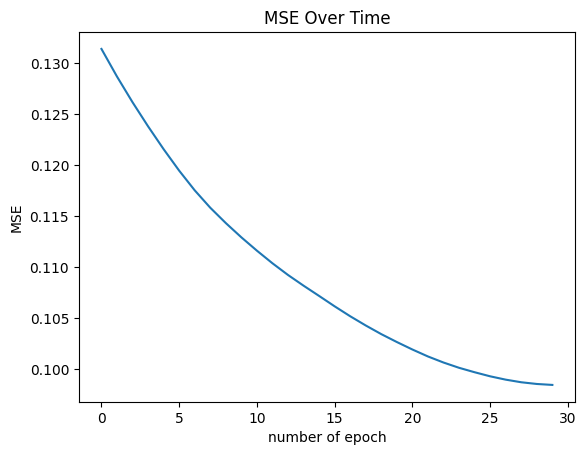

Fold 2 validation accuracy: 0.17344564199447632


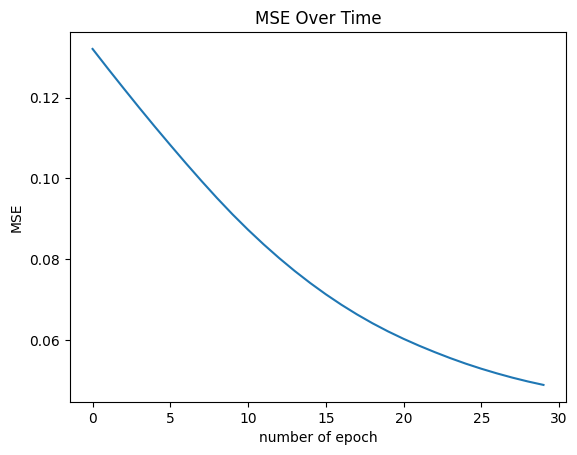

Fold 3 validation accuracy: 0.2961806356906891


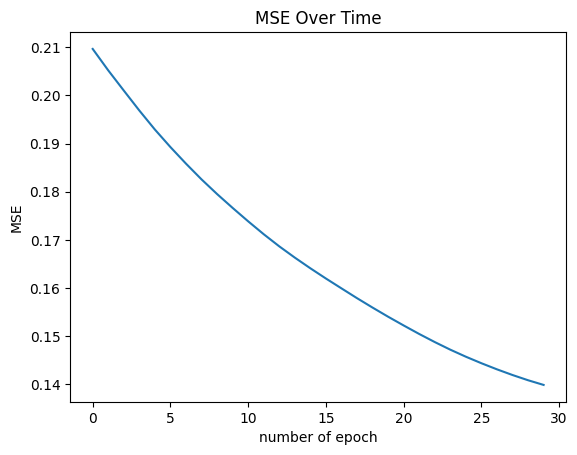

Fold 4 validation accuracy: 0.27977147698402405


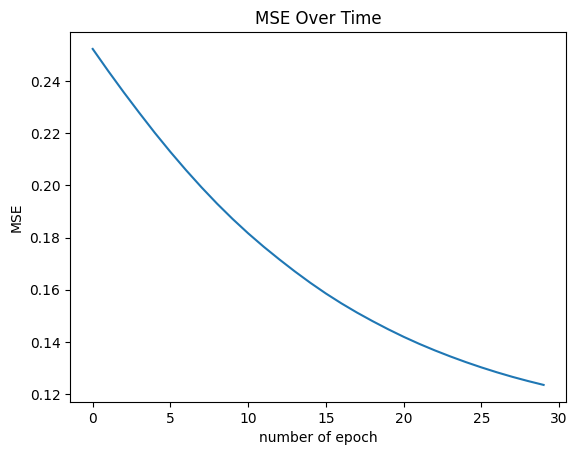

Fold 5 validation accuracy: 0.21624155342578888


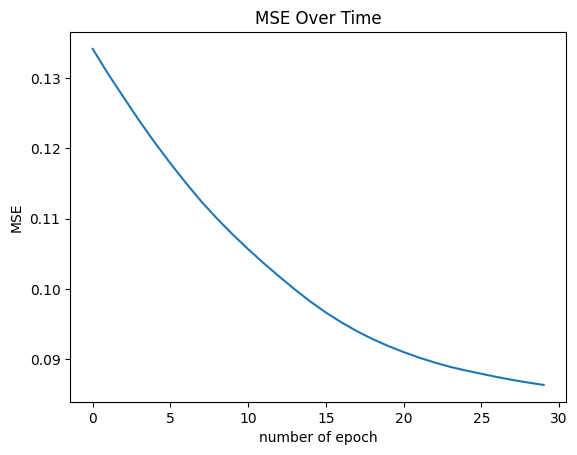

In [9]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from sklearn.metrics import mean_squared_error

# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# k-fold cross validation
fold_no = 1
for train_idx, val_idx in kfold.split(X_train, y_train):
    
    X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
    X_val_fold, y_val_fold = X_train[val_idx], y_train[val_idx]
    
    # Define the model architecture
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_fold.shape[1]))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())  
    model.add(Dense(64, activation='linear'))

    #sgd = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)
    # Compile the model
    model.compile(loss='mse', optimizer= 'adam', metrics=['mae', 'mse'])
    num_epochs = 30
    mse_values = []

    for i in range(num_epochs):
       
       # Fit the model
       history = model.fit(X_train_fold, y_train_fold, epochs=1, batch_size=40, verbose=0, validation_data=(X_val_fold, y_val_fold))
       y_pred = model.predict(X_val_fold, verbose=0)
       mse = mean_squared_error(y_val_fold, y_pred)
       mse_values.append(mse)
    # Evaluate the model
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f'Fold {fold_no} validation accuracy: {scores[1]}')

    plt.plot(range(num_epochs), mse_values)
    plt.xlabel('number of epoch')
    plt.ylabel('MSE')
    plt.title('MSE Over Time')
    plt.show()

    fold_no += 1


Now applying test set from model pairs

1/1 [==============================] - 0s 26ms/step


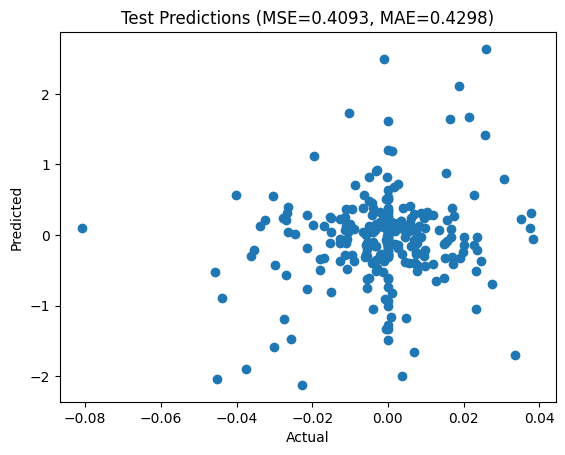

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Test Predictions (MSE={mse:.4f}, MAE={mae:.4f})')
plt.show()
